<a href="https://colab.research.google.com/github/isalesp/SBTi/blob/main/SBTi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Science-Based Targets initiative,  SBTi**

## **Executive Summary**

The SBTi is a partnership between CDP, the United Nations Global Compact, World Resources Institute (WRI) and the World Wide Fund for Nature (WWF). The SBTi call to action is one of the We Mean Business Coalition commitments.

Science-based targets show companies and financial institutions how much and how quickly businesses need to reduce their GHG emissions to prevent the worst impacts of climate change - leading them on a clear path towards decarbonization.

Targets are considered ‘science-based’ if they are in line with what the latest climate science deems necessary to meet the goals of the Paris Agreement – limiting global warming to well-below 2°C above pre-industrial levels and pursuing efforts to limit warming to 1.5°C.

Action is needed in key sectors, many of which require tailored approaches to setting targets. The SBTi provides clarity and guidance on these journeys, including for the forest, land and agriculture and finance sectors.

The SBTi is has also launched the world's first Corporate Net-Zero Standard, to ensure that companies’ net-zero targets translate into action that is consistent with achieving a net-zero world by no later than 2050.






## **Article Outline**

1.   Environment
2.   Data
3.   Cleaning
4.   Exploratory Data Analysis (EDA)
5.  





### **Environment**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

!pip install geopandas
import folium
import geopandas as gpd

     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 6.3 MB 12.1 MB/s 
     |████████████████████████████████| 16.7 MB 317 kB/s 


In [ ]:
url = "https://raw.githubusercontent.com/isalesp/SBTi/main/companies.xlsx"

In [ ]:
data = pd.read_excel(url)


## **Data**

In [ ]:
data.shape

(2735, 22)

In [ ]:
data.head(1)

,Unnamed: 0,Unnamed: 1,Company Name,ISIN,Near term - Target Status,Near term - Target Classification,Near term - Target Year,Long term - Target Status,Long term - Target Classification,Long term - Target Year,...,Organization Type,BA1.5?,BA1.5 Date,Country,Region,Sector,Date,Target,Target Classification,Extension
0,NaN,NaN,Studio XAG,NaN,Targets Set,Well-below 2°C,2030.0,NaN,NaN,NaN,...,Small or Medium Enterprise,No,NaN,Albania,Europe,Professional Services,01/01/2022,This target was approved using a streamlined t...,The targets covering greenhouse gas emissions ...,NaN


In [ ]:
data.columns.tolist()

['Unnamed: 0',
 'Unnamed: 1',
 'Company Name',
 'ISIN',
 'Near term - Target Status',
 'Near term - Target Classification',
 'Near term - Target Year',
 'Long term - Target Status',
 'Long term - Target Classification',
 'Long term - Target Year',
 'Net-Zero Committed',
 'Net-Zero Year',
 'Organization Type',
 'BA1.5?',
 'BA1.5 Date',
 'Country',
 'Region',
 'Sector',
 'Date',
 'Target',
 'Target Classification',
 'Extension']

In [ ]:
data = data.dropna(how='all', axis='columns')
data

,Company Name,ISIN,Near term - Target Status,Near term - Target Classification,Near term - Target Year,Long term - Target Status,Long term - Target Classification,Long term - Target Year,Net-Zero Committed,Net-Zero Year,Organization Type,BA1.5?,BA1.5 Date,Country,Region,Sector,Date,Target,Target Classification,Extension
0,Studio XAG,NaN,Targets Set,Well-below 2°C,2030.0,NaN,NaN,NaN,No,NaN,Small or Medium Enterprise,No,NaN,Albania,Europe,Professional Services,01/01/2022,This target was approved using a streamlined t...,The targets covering greenhouse gas emissions ...,NaN
1,Australian Ethical Investment,AU000000AEF4,Committed,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Financial Institution,Yes,01/08/2019,Australia,Oceania,"Banks, Diverse Financials, Insurance",01/12/2015,NaN,NaN,Financial Institution. Deadline to submit targ...
2,Australian Postal Corporation,NaN,Targets Set,Well-below 2°C,2025.0,NaN,NaN,NaN,No,NaN,Company,No,NaN,Australia,Oceania,Air Freight Transportation and Logistics,01/06/2021,"Australia’s leading logistics, postal and inte...",The targets covering greenhouse gas emissions ...,NaN
3,Bank Australia,NaN,Committed,NaN,NaN,NaN,NaN,NaN,No,NaN,Financial Institution,No,NaN,Australia,Oceania,"Banks, Diverse Financials, Insurance",01/11/2015,NaN,NaN,Financial Institution. Deadline to submit targ...
4,Brambles,NaN,Committed,NaN,NaN,NaN,NaN,NaN,No,NaN,Company,Yes,01/09/2020,Australia,Oceania,Air Freight Transportation and Logistics,01/12/2021,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2730,ReAcción / Alva,NaN,Committed,NaN,NaN,NaN,NaN,NaN,No,NaN,Company,Yes,01/12/2019,Uruguay,Latin America,Technology Hardware and Equipment,01/01/2020,NaN,NaN,NaN
2731,Maple Company Limited,NaN,Committed,NaN,NaN,NaN,NaN,NaN,No,NaN,Company,Yes,01/05/2020,Vietnam,Asia,"Textiles, Apparel, Footwear and Luxury Goods",01/05/2020,NaN,NaN,NaN
2732,TCE Vina Denim Joint Stock Company,NaN,Committed,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Company,Yes,01/04/2021,Vietnam,Asia,"Textiles, Apparel, Footwear and Luxury Goods",01/04/2021,NaN,NaN,NaN
2733,"TCE Jeans Co., Ltd",NaN,Committed,NaN,NaN,NaN,NaN,NaN,No,NaN,Company,Yes,01/10/2021,Vietnam,Asia,"Textiles, Apparel, Footwear and Luxury Goods",01/10/2021,NaN,NaN,NaN


In [ ]:
data.dtypes

Company Name                         object
ISIN                                 object
Near term - Target Status            object
Near term - Target Classification    object
Near term - Target Year              object
Long term - Target Status            object
Long term - Target Classification    object
Long term - Target Year              object
Net-Zero Committed                   object
Net-Zero Year                        object
Organization Type                    object
BA1.5?                               object
BA1.5 Date                           object
Country                              object
Region                               object
Sector                               object
Date                                 object
Target                               object
Target Classification                object
Extension                            object
dtype: object

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])
data.head(1)

,Company Name,ISIN,Near term - Target Status,Near term - Target Classification,Near term - Target Year,Long term - Target Status,Long term - Target Classification,Long term - Target Year,Net-Zero Committed,Net-Zero Year,Organization Type,BA1.5?,BA1.5 Date,Country,Region,Sector,Date,Target,Target Classification,Extension
0,Studio XAG,NaN,Targets Set,Well-below 2°C,2030.0,NaN,NaN,NaN,No,NaN,Small or Medium Enterprise,No,NaN,Albania,Europe,Professional Services,2022-01-01,This target was approved using a streamlined t...,The targets covering greenhouse gas emissions ...,NaN


In [ ]:
data.dtypes

Company Name                                 object
ISIN                                         object
Near term - Target Status                    object
Near term - Target Classification            object
Near term - Target Year                      object
Long term - Target Status                    object
Long term - Target Classification            object
Long term - Target Year                      object
Net-Zero Committed                           object
Net-Zero Year                                object
Organization Type                            object
BA1.5?                                       object
BA1.5 Date                                   object
Country                                      object
Region                                       object
Sector                                       object
Date                                 datetime64[ns]
Target                                       object
Target Classification                        object
Extension   

## **Cleaning**

In [ ]:
null values 

In [ ]:
udc = ['Near term - Target Status', 'Near term - Target Classification','Net-Zero Committed','Organization Type', 'Region', 'Sector'] 

for col in data[udc]:
    print(col)
    print(data[col].value_counts())
    print('\n')


Near term - Target Status
Committed      1479
Targets Set    1247
Targets set       9
Name: Near term - Target Status, dtype: int64


Near term - Target Classification
1.5°C                   883
Well-below 2°C          279
2°C                      94
1.5°C/Well-below 2°C      1
Name: Near term - Target Classification, dtype: int64


Net-Zero Committed
No     1775
Yes     960
Name: Net-Zero Committed, dtype: int64


Organization Type
Company                       2271
Small or Medium Enterprise     323
Financial Institution          141
Name: Organization Type, dtype: int64


Region
Europe           1526
Asia              561
North America     455
Latin America      92
Oceania            75
Africa             24
europe              1
north America       1
Name: Region, dtype: int64


Sector
Professional Services                                                                                                       234
Food and Beverage Processing                                          

In [ ]:
data.loc[data["Near term - Target Status"]== "Targets set", "Near term - Target Status"] = "Targets Set"
data.loc[data["Region"]== "europe", "Region"] = "Europe"
data.loc[data["Region"]== "north America", "Region"] = "North America"


In [ ]:
udcs = ['Near term - Target Status', 'Region']
for col in data[udcs]:
    print(col)
    print(data[col].value_counts())
    print('\n')

Near term - Target Status
Committed      1479
Targets Set    1256
Name: Near term - Target Status, dtype: int64


Region
Europe           1527
Asia              561
North America     456
Latin America      92
Oceania            75
Africa             24
Name: Region, dtype: int64




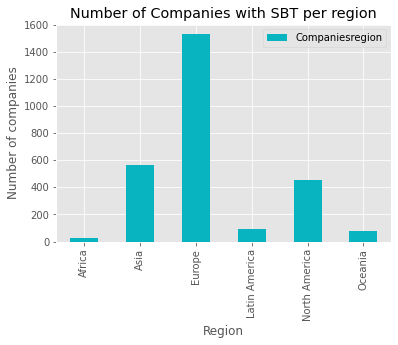

In [ ]:
tb1 = data.groupby(["Region"])["Company Name"].count()
tb1 = tb1.to_frame(name = "Companiesregion")
tb1
f1 = tb1.plot(kind = "bar", color = "#08b4bf")
plt.title("Number of Companies with SBT per region")
plt.ylabel("Number of companies")
plt.xlabel("Region")
plt.show()

In [ ]:
tb2 = data.groupby(["Country"])["Company Name"].count()
tb2 = tb2.to_frame(name = "Number of Companies").reset_index()
tb2

,Country,Number of Companies
0,Albania,1
1,Australia,58
2,Austria,22
3,Bangladesh,2
4,Belgium,55
...,...,...
68,United Arab Emirates (UAE),8
69,United Kingdom (UK),483
70,United States of America (USA),401
71,Uruguay,3


In [ ]:
world_geo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
nid = pd.merge(world_geo, tb2, left_on= "name", right_on = "Country", how="outer")
nid = nid[nid.geometry.isnull()]
nid

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Number of Companies
177,NaN,NaN,NaN,NaN,NaN,None,Bermuda,3.0
178,NaN,NaN,NaN,NaN,NaN,None,Czech Republic,2.0
179,NaN,NaN,NaN,NaN,NaN,None,Hong Kong,31.0
180,NaN,NaN,NaN,NaN,NaN,None,Jersey,1.0
181,NaN,NaN,NaN,NaN,NaN,None,Malta,1.0
182,NaN,NaN,NaN,NaN,NaN,None,Mauritius,3.0
183,NaN,NaN,NaN,NaN,NaN,None,Singapore,18.0
184,NaN,NaN,NaN,NaN,NaN,None,"Taiwan, Province of China",40.0
185,NaN,NaN,NaN,NaN,NaN,None,United Arab Emirates (UAE),8.0
186,NaN,NaN,NaN,NaN,NaN,None,United Kingdom (UK),483.0


In [ ]:
tb2_1 = tb2.replace({ "Country" : { 
    "Czech Republic":"Czechia",
    "Taiwan, Province of China": "Taiwan",
    "United Arab Emirates (UAE)": "United Arab Emirates",
    "United Kingdom (UK)": "United Kingdom",
    "United States of America (USA)": "United States of America"}})
    
tb2_1

,Country,Number of Companies
0,Albania,1
1,Australia,58
2,Austria,22
3,Bangladesh,2
4,Belgium,55
...,...,...
68,United Arab Emirates,8
69,United Kingdom,483
70,United States of America,401
71,Uruguay,3


In [ ]:
tb2_1.sort_values(by=["Number of Companies"], ascending= False).head(10)

,Country,Number of Companies
69,United Kingdom,483
70,United States of America,401
32,Japan,209
20,France,146
61,Sweden,143
21,Germany,138
44,Netherlands,78
16,Denmark,78
27,India,71
62,Switzerland,71


In [ ]:
tb3 = world_geo.merge(tb2_1, left_on= "name", right_on = "Country", how="inner")
tb3 = tb3.dropna(subset = ["Number of Companies"])
tb3
      

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Number of Companies
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,52
1,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,401
2,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,4
3,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",Chile,22
4,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",Kenya,3
...,...,...,...,...,...,...,...,...
62,6943739,South America,Paraguay,PRY,64670.0,"POLYGON ((-58.16639 -20.17670, -57.87067 -20.7...",Paraguay,1
63,28571770,Asia,Saudi Arabia,SAU,1731000.0,"POLYGON ((34.95604 29.35655, 36.06894 29.19749...",Saudi Arabia,1
64,1221549,Asia,Cyprus,CYP,29260.0,"POLYGON ((32.73178 35.14003, 32.91957 35.08783...",Cyprus,2
65,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",Egypt,4


In [ ]:
world_map = folium.Map(location=[0, 0], zoom_start=1)
world_map.choropleth(
    geo_data= tb3,
    data= tb3,
    columns=["Country", "Number of Companies"],
    key_on="feature.properties.name",
    fill_color= "YlGnBu", 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name = "SBT companies distribution per country",
)

style_function = "font-size : 15px; fond-weight: bold"

world_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


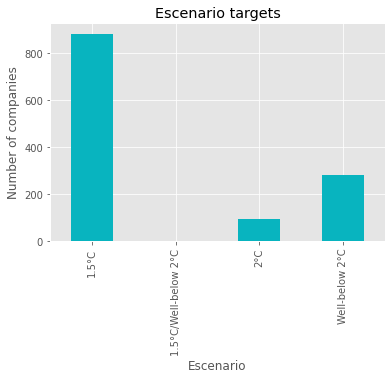

In [ ]:
tb4 = data.groupby(["Near term - Target Classification"])["Company Name"].count()
f2 = tb4.plot(kind = "bar", color = "#08b4bf")
plt.title("Escenario targets")
plt.ylabel("Number of companies")
plt.xlabel("Escenario")
plt.show()

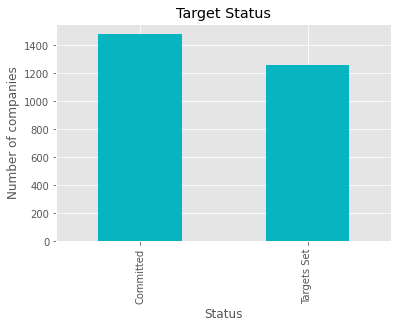

In [ ]:
tb5 = data.groupby(["Near term - Target Status"])["Company Name"].count()
f3 = tb5.plot(kind = "bar", color = "#08b4bf")
plt.title("Target Status")
plt.ylabel("Number of companies")
plt.xlabel("Status")
plt.show()


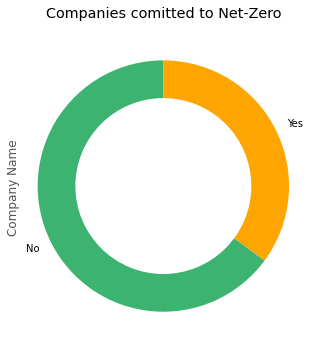

In [ ]:
tb6 = data.groupby(["Net-Zero Committed"])["Company Name"].count()

f4 = tb6.plot(kind='pie',
        figsize=(5, 6),
        colors = ("#3cb371", "#ffa500"), 
        startangle=90,     
        shadow=False,            
        )

plt.title('Companies comitted to Net-Zero')
plt.axis('equal') 

center_circle = plt.Circle((0,0), 0.70, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()

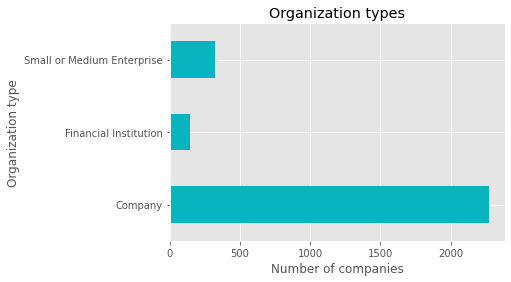

In [ ]:
tb7 = data.groupby(["Organization Type"])["Company Name"].count()

f5 = tb7.plot(kind = "barh", color = "#08b4bf")
plt.title("Organization types")
plt.ylabel("Organization type")
plt.xlabel("Number of companies")
plt.show()


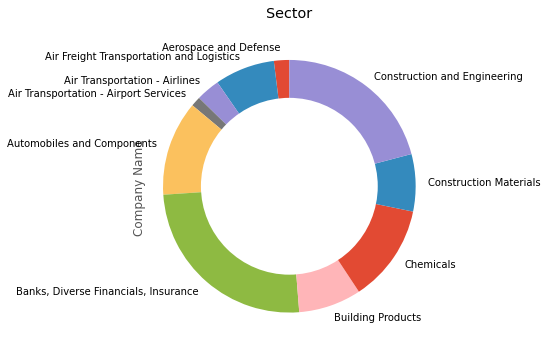

In [ ]:
st = data.groupby(["Sector"])["Company Name"].count()
st = st.head(10)

st.plot(kind='pie',
        figsize=(5, 6), 
        startangle=90,     
        shadow=False,            
        )

plt.title('Sector')
plt.axis('equal') 

center_circle_1 = plt.Circle((0,0), 0.70, fc = "white")
fig_1 = plt.gcf()
fig_1.gca().add_artist(center_circle_1)

plt.show()


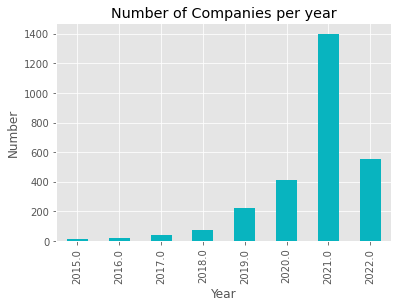

In [ ]:
yrs = data.groupby(data['Date'].dt.year)["Company Name"].count()
bnbn= yrs.plot(kind = "bar", color = "#08b4bf")
plt.title("Number of Companies per year")
plt.ylabel("Number")
plt.xlabel("Year")
plt.show()

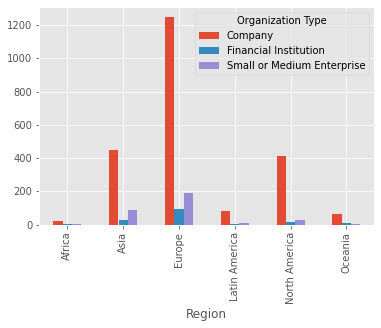

In [ ]:
pvt1 = pd.pivot_table(data, values='Company Name', index=['Region'],
                    columns=['Organization Type'], aggfunc= "count")
pvt1.plot(kind = "bar")


In [188]:
pvt2 = pd.pivot_table(data, values="Company Name", index="Region", columns= "Sector",
                   aggfunc= "count")

pvt2 = pvt2.fillna(0)
pvt2

Sector,Aerospace and Defense,Air Freight Transportation and Logistics,Air Transportation - Airlines,Air Transportation - Airport Services,Automobiles and Components,"Banks, Diverse Financials, Insurance",Building Products,Chemicals,Construction Materials,Construction and Engineering,...,Technology Hardware and Equipment,Telecommunication Services,"Textile Manufacturing, Spinning, Weaving & Apparel","Textiles, Apparel, Footwear and Luxury Goods",Tires,Tobacco,"Trading Companies and Distributors, and Commercial Services and Supplies",Water Transportation - Ports and Services,Water Transportation - Water Transportation,Water Utilities
Region,,,,,,,,,,,,,,,,,,,,,
Africa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,...,0.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
Asia,0.0,8.0,2.0,0.0,22.0,27.0,10.0,23.0,13.0,23.0,...,45.0,18.0,2.0,65.0,1.0,2.0,15.0,1.0,4.0,0.0
Europe,10.0,27.0,9.0,5.0,30.0,91.0,27.0,33.0,21.0,81.0,...,23.0,41.0,0.0,70.0,3.0,5.0,34.0,2.0,5.0,7.0
Latin America,1.0,0.0,3.0,0.0,4.0,3.0,1.0,4.0,5.0,1.0,...,1.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,2.0
North America,0.0,5.0,3.0,1.0,11.0,12.0,7.0,8.0,0.0,8.0,...,14.0,7.0,1.0,29.0,0.0,3.0,5.0,0.0,1.0,1.0
Oceania,0.0,3.0,0.0,1.0,1.0,7.0,0.0,0.0,2.0,3.0,...,0.0,5.0,0.0,1.0,0.0,0.0,4.0,2.0,1.0,2.0


In [ ]:
fig = plt.figure(figsize=(15,10))

for i, (name, row) in enumerate(pvt2.iterrows()):
    ax = plt.subplot(2,3, i+1)
    ax.set_title(row.name)
    ax.barh(row, width = 0)

plt.show()